In [1]:
import sys
import os
from utils import *

/home/ljaffeux/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2025-06-03 15:11:01.932965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748956262.034272  117261 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748956262.070534  117261 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-03 15:11:02.346658: I tensorflow/core/platform/cpu_f

# Load a version of the autoencoder for anomaly and use it on some dataset

## Scan for versions of AE for the user to choose from 

In [2]:
data_root='../Data'
default_dir = 'Anomaly_detection'
scan_tuner_versions(default_dir)

Scanning directory: Anomaly_detection
Found version 'LIAISE_1_simple' in 'Anomaly_detection/tuner_results_LIAISE_1_simple':
    LSTM_CNN: ✅
    Attention: ❌
    Custom: ❌
Found version 'LIAISE_4' in 'Anomaly_detection/tuner_results_LIAISE_4':
    LSTM_CNN: ✅
    Attention: ✅
    Custom: ❌
Found version 'LIAISE_5Hz_simple' in 'Anomaly_detection/tuner_results_LIAISE_5Hz_simple':
    LSTM_CNN: ✅
    Attention: ❌
    Custom: ❌
Found version 'LIAISE_2_simple' in 'Anomaly_detection/tuner_results_LIAISE_2_simple':
    LSTM_CNN: ✅
    Attention: ❌
    Custom: ❌
Found version 'LIAISE_4_simple' in 'Anomaly_detection/tuner_results_LIAISE_4_simple':
    LSTM_CNN: ✅
    Attention: ❌
    Custom: ❌
Found version 'IMU2_0_simple' in 'Anomaly_detection/tuner_results_IMU2_0_simple':
    LSTM_CNN: ✅
    Attention: ❌
    Custom: ❌
Found version 'LIAISE_MAESTRO_0_simple' in 'Anomaly_detection/tuner_results_LIAISE_MAESTRO_0_simple':
    LSTM_CNN: ✅
    Attention: ❌
    Custom: ❌


## User defines version and model to use

In [3]:
version = 'LIAISE_5Hz'
model = 'LSTM_CNN'# 'LSTM_CNN' or 'Attention'

## Show contextual data within the folder


📄 Configuration loaded from Anomaly_detection/LIAISE_5Hz/config.txt:

Key          | Value
-------------|-----------------------------------------
timesteps    | 120
resampling   | '5s'
data         | '['LIAISE']'
INS          | '['IMU1']'
features     | ['AOA_RAD', 'AOS_RAD', 'PITCH', 'ROLL', 'GROUND_SPEED', 'VERTICAL_SPEED', 'TAS']
version      | LIAISE_5Hz
observations | 
---------------------------------------------------------------------------------
Loading LSTM_CNN model


2025-06-03 15:11:15.479925: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_8 (InputLayer)     │ (None, 120, 7)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 120, 16)        │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 60, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 120, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120, 16)        │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 120, 16)        │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 120, 7)         │           119 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,960 (42.82 KB)

 Trainable params: 5,479 (21.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,481 (21.41 KB)

🖼️ Displaying training plot: Anomaly_detection/LIAISE_5Hz/Training_LSTM_CNN.png


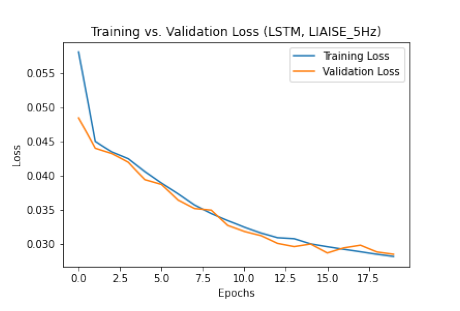

In [4]:
import matplotlib.image as mpimg
# Reading config file
config_path = f'{default_dir}/{version}/config.txt'
if os.path.exists(config_path):
    print(f"\n📄 Configuration loaded from {config_path}:\n")

    config_entries = []
    with open(config_path, "r") as f:
        for line in f:
            line = line.strip()
            if "=" in line:
                key, value = map(str.strip, line.split("=", 1))
                config_entries.append((key, value))

    # Calculate the max width of the key column for alignment
    max_key_len = max(len(k) for k, _ in config_entries)

    # Print header
    print(f"{'Key'.ljust(max_key_len)} | Value")
    print(f"{'-' * max_key_len}-|-{'-' * 40}")

    # Print key-value pairs
    for key, value in config_entries:
        print(f"{key.ljust(max_key_len)} | {value}")

# Store relevant infos for applying the model
timesteps = int(config_entries[0][1])
resampling = config_entries[1][1][1:-1]
features = ast.literal_eval((config_entries[4][1]))

print('---------------------------------------------------------------------------------')
print(f'Loading {model} model')
# Required to load the attention model
# if the attention layer is modified in the training so should this part
# Self-Attention Layer
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Attention, LayerNormalization
from keras.saving import register_keras_serializable

@register_keras_serializable(package="Custom") 
class SelfAttention(Layer):
    def __init__(self, num_heads, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.num_heads = num_heads

    def build(self, input_shape):
        self.query_dense = Dense(input_shape[-1])
        self.key_dense = Dense(input_shape[-1])
        self.value_dense = Dense(input_shape[-1])
        self.attention = Attention()
        self.layer_norm = LayerNormalization()

    def call(self, inputs):
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        attention_output = self.attention([query, key, value])
        return self.layer_norm(attention_output + inputs)

    def get_config(self):
        config = super().get_config()
        config.update({"num_heads": self.num_heads})
        return config

best_model = keras.saving.load_model(
    f"{default_dir}/{version}/{model}.keras",
    custom_objects={"SelfAttention": SelfAttention}
)
# Custom loading model
scaler = joblib.load(f'{default_dir}/{version}/scaler_train.pkl')

best_model.summary()
image_path = f'{default_dir}/{version}/Training_{model}.png'


print(f"🖼️ Displaying training plot: {image_path}")
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# User defines the data set they want to analyze, whether they want to plot the error time series for each flight (Err_TS) and overall error distribution and feature contribution (Err_hist)

In [5]:
# Campaign you want to use the model on
campaign = 'MAESTRO'
INS = 'IMU1' # unconsequential if not MAESTRO (hard coded)
Err_TS = True # Plot time series by flights
Err_hist = True # Plot histograms of RE and feature contributions

🔄 Processing data...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [02:36<00:00,  6.51s/it]


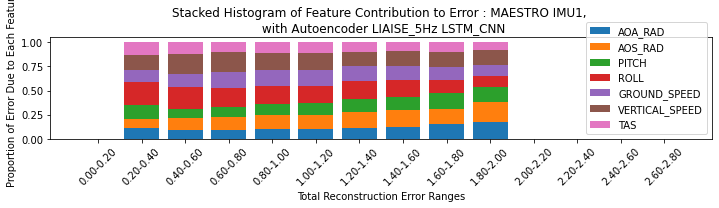

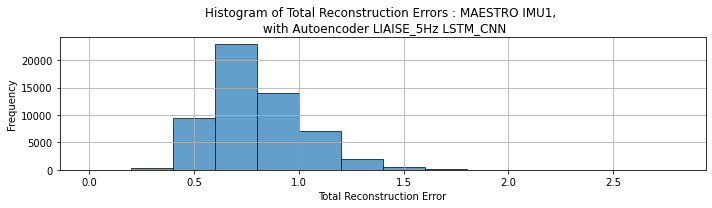

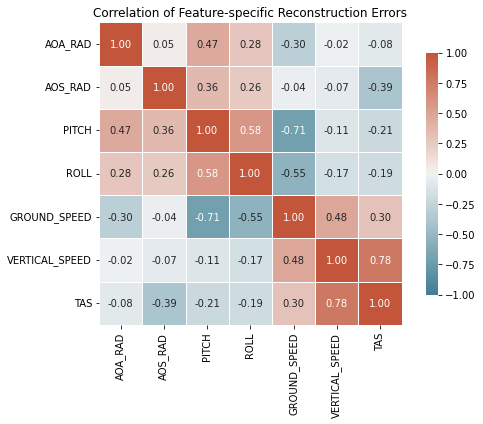

🔄 Processing data...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [02:43<00:00,  6.83s/it]


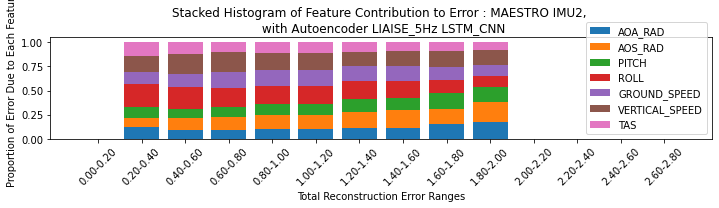

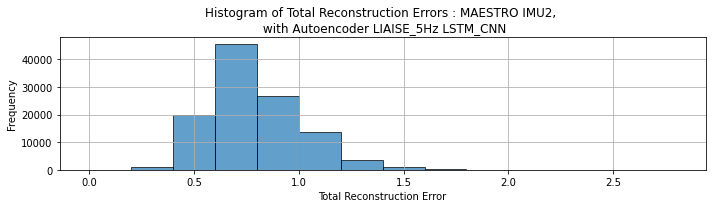

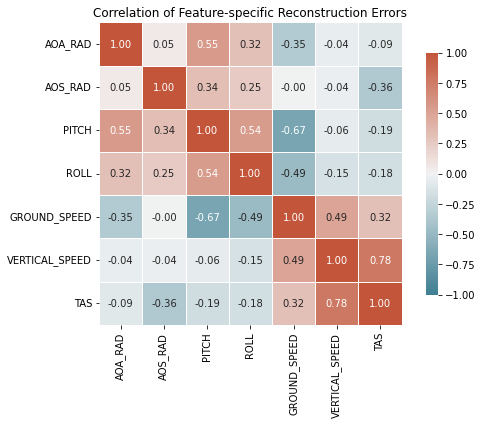

In [9]:
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps):
        sequences.append(data[i : i + timesteps])  # Extract time window
    return np.array(sequences)


tab_tot = []
tab_errr = []
version_dir = f'Anomaly_detection/{version}'
for INS in ['IMU1','IMU2']:
    print("🔄 Processing data...")
    if not campaign == 'MAESTRO':
        INS=''
    segmentation_dir = f'{data_root}/Segmentation_default/{campaign}/{INS}'
    raw_data_dir = f'{data_root}/Raw'
    results = []
    # make plot dir
    plot_dir = f'../Plots/{version}/{model}/{campaign}{INS}'
    os.makedirs(plot_dir ,exist_ok = True)
    if not os.path.exists(segmentation_dir):
        print(f"Segmentation directory not found: {segmentation_dir}")
    
    for fname in tqdm(os.listdir(segmentation_dir)):
        if not fname.endswith('.yaml'):
            continue
    
        flight_number = extract_flight_number(fname)
        if flight_number is None:
            continue
        if flight_number < 200009 and campaign == 'EUREC4A': # Special condition for EUREC4A
            print(f'Skipping bad EUREC4A flight {flight_number}')
            continue
        yaml_path = os.path.join(segmentation_dir, fname)
    
        # Match raw data folder
        matching_raw_folder = [f for f in os.listdir(raw_data_dir)
                               if os.path.isdir(os.path.join(raw_data_dir, f)) and campaign in f and INS in f]
        
        if not matching_raw_folder:
            print(f"❌ No raw folder found for {campaign} {INS}")
            continue
    
        raw_folder = os.path.join(data_root, 'Raw', matching_raw_folder[0])
        # Look for any .nc file containing the flight number
        flight_str = f'{flight_number:02d}'
        nc_candidates = [f for f in os.listdir(raw_folder)
                         if f.endswith('.nc') and flight_str in f]
        
        if not nc_candidates:
            print(f"❌ No matching .nc file found for flight {flight_number} in {raw_folder}")
            continue
        
        nc_path = os.path.join(raw_folder, nc_candidates[0])  # Use first match
        df_raw = load_raw_data(nc_path)
        
        if 'GROUND_SPEED' in features:
            df_raw['GROUND_SPEED'] = np.sqrt(df_raw['NORTH_SPEED']**2 + df_raw['EAST_SPEED']**2)
    
        # make df variables consistent
        if 'SIDESLIP_RAD' in df_raw.columns:
            df_raw['AOS_RAD'] = df_raw['SIDESLIP_RAD']
        if 'ALTI_INS' in df_raw.columns:
            df_raw['ALTITUDE'] = df_raw['ALTI_INS']
            
        # Data scaling
        new_data_scaled = scaler.transform(df_raw[features].dropna().resample(resampling).mean().dropna().values)
        X_new = create_sequences(new_data_scaled, timesteps)
        # Ready to be used
        # Predictions
        predictions = best_model.predict(X_new, verbose = None)
        # Extracting feature errors, total errors and contributions
        feature_errors = np.mean(np.abs(X_new[:,:,:] - predictions[:,:,:]), axis=(1))
        total_errors = np.sum(feature_errors, axis=1)
        feature_proportions = feature_errors / total_errors[:, None]
        tab_tot.extend(total_errors)
        tab_errr.extend(feature_proportions)
        if Err_TS : 
            fig, axes = plt.subplots(3, 1, figsize=(14, 6))
    
            # First subplot for Reconstruction Error
            if isinstance(feature_errors, np.ndarray):
                feature_errors_df = pd.DataFrame(feature_errors, columns=features)
            else:
                feature_errors_df = feature_errors  # Assume it's already a DataFrame with columns = features
            
            axes[0].stackplot(
                range(len(feature_errors_df)),
                feature_errors_df.T,
                labels=features,
                alpha=0.8
            )
            # optionnal reference
            # axes[0].axhline(y=0.3, color='r', linestyle='--', label="Threshold")
            # axes[0].scatter(anomaly_indices, reconstruction_error[anomaly_indices], color='red', label="Anomalies")
            axes[0].set_xlabel("Time Step")
            axes[0].set_ylabel("Reconstruction Error")
            axes[0].set_title(f"Anomaly Detection for {campaign} {INS} flight {flight_number}, \n with Autoencoder {version} {model}")
            axes[0].legend()
    
            # Second subplot for HEADING
            axes[1].plot(df_raw.dropna()['HEADING'], label="Heading")
            axes[1].set_xlabel("Time Step")
            axes[1].set_ylabel("Heading")
            axes[1].legend()
    
            # Third subplot for ALTITUDE
            axes[2].plot(df_raw.dropna()['ALTITUDE'], label="Altitude")
            axes[2].set_xlabel("Time Step")
            axes[2].set_ylabel("Altitude")
            axes[2].legend()
            
            axes[0].grid()
            axes[1].grid()
            axes[2].grid()
            # Adjust layout for better spacing between subplots
            plt.tight_layout()
            # Save the figure with all subplots
            plt.savefig(f'{plot_dir}/Flight{flight_number}_subplots.png')
            plt.close()
            
    if Err_hist:
        # Use the accumulated errors and proportions
        total_errors = np.array(tab_tot)
        feature_proportions = np.array(tab_errr)
        bins = np.arange(0,3,0.2)
        num_bins = len(bins) - 1
        # Assign each sequence to a bin
        bin_indices = np.digitize(total_errors, bins) - 1  # Adjust indexing to start at 0
    
        # Compute mean feature proportions per bin
        bin_feature_proportions = np.array([
            np.mean(feature_proportions[bin_indices == i], axis=0) if np.any(bin_indices == i) else np.zeros(feature_proportions.shape[1])
            for i in range(num_bins)
        ])
        # Define feature labels (if available)
        num_features = feature_proportions.shape[1]
        feature_labels = features
    
        # Plot stacked histogram
        fig, ax = plt.subplots(figsize=(10, 3))
        bottom = np.zeros(num_bins)
    
        for i in range(num_features):
            ax.bar(range(num_bins), bin_feature_proportions[:, i], bottom=bottom, label=feature_labels[i])
            bottom += bin_feature_proportions[:, i]
    
        ax.set_xticks(range(num_bins))
        ax.set_xticklabels([f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(num_bins)], rotation=45)
        ax.set_xlabel("Total Reconstruction Error Ranges")
        ax.set_ylabel("Proportion of Error Due to Each Feature")
        ax.set_title(f"Stacked Histogram of Feature Contribution to Error : {campaign} {INS}, \n with Autoencoder {version} {model}")
        ax.legend()
        plt.tight_layout()
        plt.savefig(f'{plot_dir}/Feature_contribution_{model}_{campaign}{INS}.png', dpi=300)
        plt.show()
    
        # Plot histogram of total errors
        fig, ax = plt.subplots(figsize=(10, 3))
        ax.hist(total_errors, bins=bins, edgecolor='black', alpha=0.7)
        ax.set_xlabel("Total Reconstruction Error")
        ax.set_ylabel("Frequency")
        ax.set_title(f"Histogram of Total Reconstruction Errors : {campaign} {INS}, \n with Autoencoder {version} {model}")
        ax.grid(True)
        plt.tight_layout()
        plt.savefig(f'{plot_dir}/Error_distribution_{model}_{campaign}{INS}.png', dpi=300)
        plt.show()
        # feature_errors: shape (num_sequences, num_features)
        error_corr = plot_feature_error_correlation(feature_errors, features)

# Similar with added bias

In [46]:
# Campaign you want to use the model on
campaign = 'MAESTRO'
INS = 'IMU2' # unconsequential if not MAESTRO (hard coded)
Err_TS = True # Plot time series by flights
Err_hist = True # Plot histograms of RE and feature contributions
if INS =='IMU1':
    aoa_b = 0.122 * np.pi / 180
    aos_b = 0.622 * np.pi / 180

if INS =='IMU2':
    aoa_b = 0.0 * np.pi / 180
    aos_b = 0.545 * np.pi / 180

In [56]:
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps):
        sequences.append(data[i : i + timesteps])  # Extract time window
    return np.array(sequences)


tab_tot = []
tab_errr = []
version_dir = f'Anomaly_detection/{version}'

print("🔄 Processing data...")
if not campaign == 'MAESTRO':
    INS=''
segmentation_dir = f'{data_root}/Segmentation_default/{campaign}/{INS}'
raw_data_dir = f'{data_root}/Raw'
results = []
# make plot dir
plot_dir = f'../Plots/{version}/{model}/{campaign}{INS}_b'
os.makedirs(plot_dir ,exist_ok = True)
if not os.path.exists(segmentation_dir):
    print(f"Segmentation directory not found: {segmentation_dir}")

for fname in tqdm(os.listdir(segmentation_dir)):
    if not fname.endswith('.yaml'):
        continue

    flight_number = extract_flight_number(fname)
    if flight_number is None:
        continue

    yaml_path = os.path.join(segmentation_dir, fname)

    # Match raw data folder
    matching_raw_folder = [f for f in os.listdir(raw_data_dir)
                           if os.path.isdir(os.path.join(raw_data_dir, f)) and campaign in f and INS in f]
    if not matching_raw_folder:
        print(f"❌ No raw folder found for {campaign} {INS}")
        continue

    raw_folder = os.path.join(data_root, 'Raw', matching_raw_folder[0])
    # Look for any .nc file containing the flight number
    flight_str = f'{flight_number:02d}'
    nc_candidates = [f for f in os.listdir(raw_folder)
                     if f.endswith('.nc') and flight_str in f]
    
    if not nc_candidates:
        print(f"❌ No matching .nc file found for flight {flight_number} in {raw_folder}")
        continue
    
    nc_path = os.path.join(raw_folder, nc_candidates[0])  # Use first match
    # print(f"  - Loading NetCDF: {nc_candidates[0]}")

    yaml_data = read_yaml(yaml_path)
    df_raw = load_raw_data(nc_path)
    if 'GROUND_SPEED' in features:
        df_raw['GROUND_SPEED'] = np.sqrt(df_raw['NORTH_SPEED']**2 + df_raw['EAST_SPEED']**2)

    # make df variables more consistent
    if 'SIDESLIP_RAD' in df_raw.columns:
        df_raw['AOS_RAD'] = df_raw['SIDESLIP_RAD']
    if 'ALTI_INS' in df_raw.columns:
        df_raw['ALTITUDE'] = df_raw['ALTI_INS']
    df_raw['AOA_RAD'] = df_raw['AOA_RAD'] - aoa_b
    df_raw['AOS_RAD'] = df_raw['AOS_RAD'] - aos_b
    # Data scaling
    new_data_scaled = scaler.transform(df_raw[features].dropna().resample(resampling).mean().dropna().values)
    # Ready to be used
    X_new = create_sequences(new_data_scaled, timesteps)
    # Predictions
    predictions = best_model.predict(X_new, verbose = None)
    # Extracting feature errors, total errors and contributions
    feature_errors = np.mean(np.abs(X_new[:,:,:] - predictions[:,:,:]), axis=(1))
    total_errors = np.sum(feature_errors, axis=1)
    feature_proportions = feature_errors / total_errors[:, None]
    tab_tot.extend(total_errors)
    tab_errr.extend(feature_proportions)
    if Err_TS : 
        fig, axes = plt.subplots(3, 1, figsize=(14, 6))

        # First subplot for Reconstruction Error
        if isinstance(feature_errors, np.ndarray):
            feature_errors_df = pd.DataFrame(feature_errors, columns=features)
        else:
            feature_errors_df = feature_errors  # Assume it's already a DataFrame with columns = features
        
        axes[0].stackplot(
            range(len(feature_errors_df)),
            feature_errors_df.T,
            labels=features,
            alpha=0.8
        )
        # optionnal reference
        # axes[0].axhline(y=0.3, color='r', linestyle='--', label="Threshold")
        # axes[0].scatter(anomaly_indices, reconstruction_error[anomaly_indices], color='red', label="Anomalies")
        axes[0].set_xlabel("Time Step")
        axes[0].set_ylabel("Reconstruction Error")
        axes[0].set_title(f"Anomaly Detection for {campaign} {INS} flight {flight_number} (biased), \n with Autoencoder {version} {model}")
        axes[0].legend()

        # Second subplot for HEADING
        axes[1].plot(df_raw.dropna()['HEADING'], label="Heading")
        axes[1].set_xlabel("Time Step")
        axes[1].set_ylabel("Heading")
        axes[1].legend()

        # Third subplot for ALTITUDE
        axes[2].plot(df_raw.dropna()['ALTITUDE'], label="Altitude")
        axes[2].set_xlabel("Time Step")
        axes[2].set_ylabel("Altitude")
        axes[2].legend()
        
        axes[0].grid()
        axes[1].grid()
        axes[2].grid()
        # Adjust layout for better spacing between subplots
        plt.tight_layout()
        # Save the figure with all subplots
        plt.savefig(f'{plot_dir}/Flight{flight_number}_subplots.png')
        plt.close()
        
if Err_hist:
    
    bins = np.arange(0,3.05,0.2)
    num_bins = len(bins) -1
    # Assign each sequence to a bin
    bin_indices = np.digitize(total_errors, bins) - 1  # Adjust indexing to start at 0

    # Compute mean feature proportions per bin
    bin_feature_proportions = np.array([
        np.mean(feature_proportions[bin_indices == i], axis=0) for i in range(num_bins)
    ])
    # Define feature labels (if available)
    num_features = feature_errors.shape[1]
    feature_labels = features

    # Plot stacked histogram
    fig, ax = plt.subplots(figsize=(10, 3))
    bottom = np.zeros(num_bins)

    # Plot each feature as a stacked segment
    for i in range(num_features):
        ax.bar(range(num_bins), bin_feature_proportions[:, i], bottom=bottom, label=feature_labels[i])
        bottom += bin_feature_proportions[:, i]

    # Labeling
    ax.set_xticks(range(num_bins))
    ax.set_xticklabels([f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(num_bins)], rotation=45)
    ax.set_xlabel("Total Reconstruction Error Ranges")
    ax.set_ylabel("Proportion of Error Due to Each Feature")
    ax.set_title(f"Stacked Histogram of Feature Contribution to Error : {campaign} {INS} (biased), \n with Autoencoder {version} {model}")
    ax.legend(loc="upper right")
    plt.tight_layout()
    plt.savefig(f'{plot_dir}/Feature_contribution_{model}_{campaign}{INS}.png',dpi = 300)
    plt.show()
    
    # Plot histogram of total errors
    fig, ax = plt.subplots(figsize=(10, 3))

    # Plot histogram using the bins for total errors
    ax.hist(total_errors, bins=bins, edgecolor='black', alpha=0.7)

    # Labeling
    ax.set_xlabel("Total Reconstruction Error")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of Total Reconstruction Errors : {campaign} {INS} (biased), \n with Autoencoder {version} {model}")
    ax.grid(True)
    plt.tight_layout()
    plt.savefig(f'{plot_dir}/Error_distribution_{model}_{campaign}{INS}.png',dpi = 300)
    plt.show()

🔄 Processing data...


  4%|█████                                                                                                                   | 1/24 [00:11<04:30, 11.78s/it]


KeyboardInterrupt: 

# Fine tuning pretrained (LIAISE) model to discern the differences between the two MAESTRO data set
## freeze the encoder, keep training the decoder

In [49]:
# Assuming 'model' is your loaded pre-trained model
for layer in best_model.layers:
    # Freeze all layers up to and including the first LSTM (encoder)
    if isinstance(layer, (tf.keras.layers.Conv1D, tf.keras.layers.MaxPooling1D, tf.keras.layers.LSTM)):
        layer.trainable = False
    else:
        layer.trainable = True

# Recompile after changing layer.trainable
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

# Gather both data sets (sequence and scaled) and fine tune the model

In [51]:
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps):
        sequences.append(data[i : i + timesteps])  # Extract time window
    return np.array(sequences)
    
campaign = 'MAESTRO'
X_combined = []
version_dir = f'Anomaly_detection/{version}'
for INS in ['IMU1','IMU2']:
    print("🔄 Processing data...")
    if not campaign == 'MAESTRO':
        INS=''
    segmentation_dir = f'{data_root}/Segmentation_default/{campaign}/{INS}'
    raw_data_dir = f'{data_root}/Raw'
    results = []
    # make plot dir
    plot_dir = f'../Plots/{version}/{model}/{campaign}{INS}_b'
    os.makedirs(plot_dir ,exist_ok = True)
    if not os.path.exists(segmentation_dir):
        print(f"Segmentation directory not found: {segmentation_dir}")
    
    for fname in tqdm(os.listdir(segmentation_dir)):
        if not fname.endswith('.yaml'):
            continue
    
        flight_number = extract_flight_number(fname)
        if flight_number is None:
            continue
    
        yaml_path = os.path.join(segmentation_dir, fname)
    
        # Match raw data folder
        matching_raw_folder = [f for f in os.listdir(raw_data_dir)
                               if os.path.isdir(os.path.join(raw_data_dir, f)) and campaign in f and INS in f]
        if not matching_raw_folder:
            print(f"❌ No raw folder found for {campaign} {INS}")
            continue
    
        raw_folder = os.path.join(data_root, 'Raw', matching_raw_folder[0])
        # Look for any .nc file containing the flight number
        flight_str = f'{flight_number:02d}'
        nc_candidates = [f for f in os.listdir(raw_folder)
                         if f.endswith('.nc') and flight_str in f]
        
        if not nc_candidates:
            print(f"❌ No matching .nc file found for flight {flight_number} in {raw_folder}")
            continue
        
        nc_path = os.path.join(raw_folder, nc_candidates[0])  # Use first match
        # print(f"  - Loading NetCDF: {nc_candidates[0]}")
    
        yaml_data = read_yaml(yaml_path)
        df_raw = load_raw_data(nc_path)
        if 'GROUND_SPEED' in features:
            df_raw['GROUND_SPEED'] = np.sqrt(df_raw['NORTH_SPEED']**2 + df_raw['EAST_SPEED']**2)
    
        # make df variables more consistent
        if 'SIDESLIP_RAD' in df_raw.columns:
            df_raw['AOS_RAD'] = df_raw['SIDESLIP_RAD']
        if 'ALTI_INS' in df_raw.columns:
            df_raw['ALTITUDE'] = df_raw['ALTI_INS']
        df_raw['AOA_RAD'] = df_raw['AOA_RAD']
        df_raw['AOS_RAD'] = df_raw['AOS_RAD']
        # Data scaling
        new_data_scaled = scaler.transform(df_raw[features].dropna().resample(resampling).mean().dropna().values)
        # Ready to be used
        X_combined.extend(create_sequences(new_data_scaled, timesteps))

🔄 Processing data...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [02:02<00:00,  5.11s/it]


🔄 Processing data...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [01:58<00:00,  4.95s/it]


In [54]:
X_combined = np.concatenate(X_combined, axis=0)

In [55]:
best_model.fit(X_combined, X_combined, epochs=5, batch_size=16, validation_split=0.2)

Epoch 1/5
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0179 - mae: 0.0940 - val_loss: 0.0169 - val_mae: 0.0876
Epoch 2/5
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.0170 - mae: 0.0893 - val_loss: 0.0167 - val_mae: 0.0865
Epoch 3/5
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0167 - mae: 0.0881 - val_loss: 0.0166 - val_mae: 0.0859
Epoch 4/5
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0166 - mae: 0.0875 - val_loss: 0.0166 - val_mae: 0.0855
Epoch 5/5
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0165 - mae: 0.0869 - val_loss: 0.0165 - val_mae: 0.0855


In [58]:
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps):
        sequences.append(data[i : i + timesteps])  # Extract time window
    return np.array(sequences)


tab_tot = []
tab_errr = []
version_dir = f'Anomaly_detection/{version}'
for INS in ['IMU1','IMU2']:
    print("🔄 Processing data...")
    if not campaign == 'MAESTRO':
        INS=''
    segmentation_dir = f'{data_root}/Segmentation_default/{campaign}/{INS}'
    raw_data_dir = f'{data_root}/Raw'
    results = []
    # make plot dir
    plot_dir = f'../Plots/{version}/{model}/{campaign}{INS}_fine'
    os.makedirs(plot_dir ,exist_ok = True)
    if not os.path.exists(segmentation_dir):
        print(f"Segmentation directory not found: {segmentation_dir}")
    
    for fname in tqdm(os.listdir(segmentation_dir)):
        if not fname.endswith('.yaml'):
            continue
    
        flight_number = extract_flight_number(fname)
        if flight_number is None:
            continue
        if flight_number < 200009 and campaign == 'EUREC4A': # Special condition for EUREC4A
            print(f'Skipping bad EUREC4A flight {flight_number}')
            continue
        yaml_path = os.path.join(segmentation_dir, fname)
    
        # Match raw data folder
        matching_raw_folder = [f for f in os.listdir(raw_data_dir)
                               if os.path.isdir(os.path.join(raw_data_dir, f)) and campaign in f and INS in f]
        
        if not matching_raw_folder:
            print(f"❌ No raw folder found for {campaign} {INS}")
            continue
    
        raw_folder = os.path.join(data_root, 'Raw', matching_raw_folder[0])
        # Look for any .nc file containing the flight number
        flight_str = f'{flight_number:02d}'
        nc_candidates = [f for f in os.listdir(raw_folder)
                         if f.endswith('.nc') and flight_str in f]
        
        if not nc_candidates:
            print(f"❌ No matching .nc file found for flight {flight_number} in {raw_folder}")
            continue
        
        nc_path = os.path.join(raw_folder, nc_candidates[0])  # Use first match
        df_raw = load_raw_data(nc_path)
        
        if 'GROUND_SPEED' in features:
            df_raw['GROUND_SPEED'] = np.sqrt(df_raw['NORTH_SPEED']**2 + df_raw['EAST_SPEED']**2)
    
        # make df variables consistent
        if 'SIDESLIP_RAD' in df_raw.columns:
            df_raw['AOS_RAD'] = df_raw['SIDESLIP_RAD']
        if 'ALTI_INS' in df_raw.columns:
            df_raw['ALTITUDE'] = df_raw['ALTI_INS']
            
        # Data scaling
        new_data_scaled = scaler.transform(df_raw[features].dropna().resample(resampling).mean().dropna().values)
        X_new = create_sequences(new_data_scaled, timesteps)
        # Ready to be used
        # Predictions
        predictions = best_model.predict(X_new, verbose = None)
        # Extracting feature errors, total errors and contributions
        feature_errors = np.mean(np.abs(X_new[:,:,:] - predictions[:,:,:]), axis=(1))
        total_errors = np.sum(feature_errors, axis=1)
        feature_proportions = feature_errors / total_errors[:, None]
        tab_tot.extend(total_errors)
        tab_errr.extend(feature_proportions)
        if Err_TS : 
            fig, axes = plt.subplots(3, 1, figsize=(14, 6))
    
            # First subplot for Reconstruction Error
            if isinstance(feature_errors, np.ndarray):
                feature_errors_df = pd.DataFrame(feature_errors, columns=features)
            else:
                feature_errors_df = feature_errors  # Assume it's already a DataFrame with columns = features
            
            axes[0].stackplot(
                range(len(feature_errors_df)),
                feature_errors_df.T,
                labels=features,
                alpha=0.8
            )
            # optionnal reference
            # axes[0].axhline(y=0.3, color='r', linestyle='--', label="Threshold")
            # axes[0].scatter(anomaly_indices, reconstruction_error[anomaly_indices], color='red', label="Anomalies")
            axes[0].set_xlabel("Time Step")
            axes[0].set_ylabel("Reconstruction Error")
            axes[0].set_title(f"Anomaly Detection for {campaign} {INS} flight {flight_number}, \n with Autoencoder {version} {model}")
            axes[0].legend()
    
            # Second subplot for HEADING
            axes[1].plot(df_raw.dropna()['HEADING'], label="Heading")
            axes[1].set_xlabel("Time Step")
            axes[1].set_ylabel("Heading")
            axes[1].legend()
    
            # Third subplot for ALTITUDE
            axes[2].plot(df_raw.dropna()['ALTITUDE'], label="Altitude")
            axes[2].set_xlabel("Time Step")
            axes[2].set_ylabel("Altitude")
            axes[2].legend()
            
            axes[0].grid()
            axes[1].grid()
            axes[2].grid()
            # Adjust layout for better spacing between subplots
            plt.tight_layout()
            # Save the figure with all subplots
            plt.savefig(f'{plot_dir}/Flight{flight_number}_subplots.png')
            plt.close()
            
    if Err_hist:
        # Use the accumulated errors and proportions
        total_errors = np.array(tab_tot)
        feature_proportions = np.array(tab_errr)
        bins = np.arange(0,3,0.2)
        num_bins = len(bins) - 1
        # Assign each sequence to a bin
        bin_indices = np.digitize(total_errors, bins) - 1  # Adjust indexing to start at 0
    
        # Compute mean feature proportions per bin
        bin_feature_proportions = np.array([
            np.mean(feature_proportions[bin_indices == i], axis=0) if np.any(bin_indices == i) else np.zeros(feature_proportions.shape[1])
            for i in range(num_bins)
        ])
        # Define feature labels (if available)
        num_features = feature_proportions.shape[1]
        feature_labels = features
    
        # Plot stacked histogram
        fig, ax = plt.subplots(figsize=(10, 3))
        bottom = np.zeros(num_bins)
    
        for i in range(num_features):
            ax.bar(range(num_bins), bin_feature_proportions[:, i], bottom=bottom, label=feature_labels[i])
            bottom += bin_feature_proportions[:, i]
    
        ax.set_xticks(range(num_bins))
        ax.set_xticklabels([f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(num_bins)], rotation=45)
        ax.set_xlabel("Total Reconstruction Error Ranges")
        ax.set_ylabel("Proportion of Error Due to Each Feature")
        ax.set_title(f"Stacked Histogram of Feature Contribution to Error : {campaign} {INS}, \n with Autoencoder {version} {model}")
        ax.legend()
        plt.tight_layout()
        plt.savefig(f'{plot_dir}/Feature_contribution_{model}_{campaign}{INS}.png', dpi=300)
        plt.show()
    
        # Plot histogram of total errors
        fig, ax = plt.subplots(figsize=(10, 3))
        ax.hist(total_errors, bins=bins, edgecolor='black', alpha=0.7)
        ax.set_xlabel("Total Reconstruction Error")
        ax.set_ylabel("Frequency")
        ax.set_title(f"Histogram of Total Reconstruction Errors : {campaign} {INS}, \n with Autoencoder {version} {model}")
        ax.grid(True)
        plt.tight_layout()
        plt.savefig(f'{plot_dir}/Error_distribution_{model}_{campaign}{INS}.png', dpi=300)
        plt.show()
        # feature_errors: shape (num_sequences, num_features)
        error_corr = plot_feature_error_correlation(feature_errors, features)

🔄 Processing data...


 50%|███████████████████████████████████████████████████████████▌                                                           | 12/24 [01:19<01:19,  6.66s/it]


KeyboardInterrupt: 